In [3]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


Page 1 scraped.
find next_button
click successfully
Page 2 scraped.
find next_button
click successfully
Page 3 scraped.
find next_button
click successfully
Page 4 scraped.
find next_button
click successfully
Page 5 scraped.
find next_button
click successfully
Page 6 scraped.
find next_button
click successfully
Page 7 scraped.
find next_button
click successfully
Page 8 scraped.
find next_button
click successfully
Page 9 scraped.
find next_button
click successfully
Page 10 scraped.
find next_button
click successfully
Page 11 scraped.
find next_button
click successfully
Page 12 scraped.
find next_button
click successfully
Page 13 scraped.
find next_button
click successfully
Page 14 scraped.
find next_button
click successfully
Page 15 scraped.
find next_button
click successfully
Page 16 scraped.
find next_button
click successfully
Page 17 scraped.
find next_button
click successfully
Page 18 scraped.
find next_button
click successfully
Page 19 scraped.
find next_button
click successfully
Pa
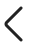
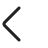
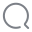
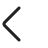
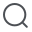
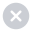
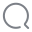
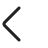
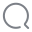
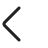
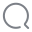
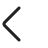
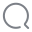
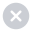
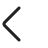
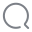
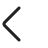
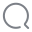
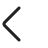
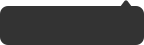
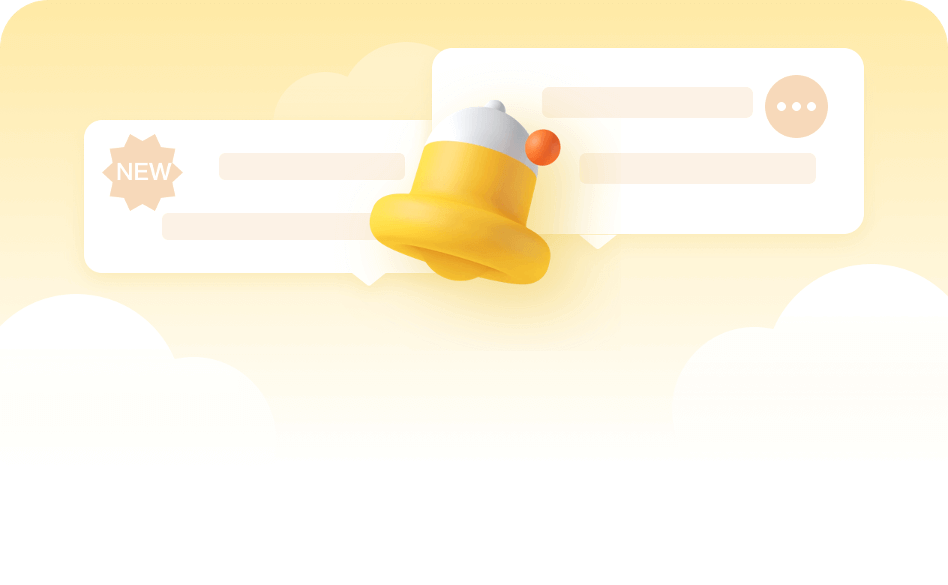
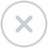
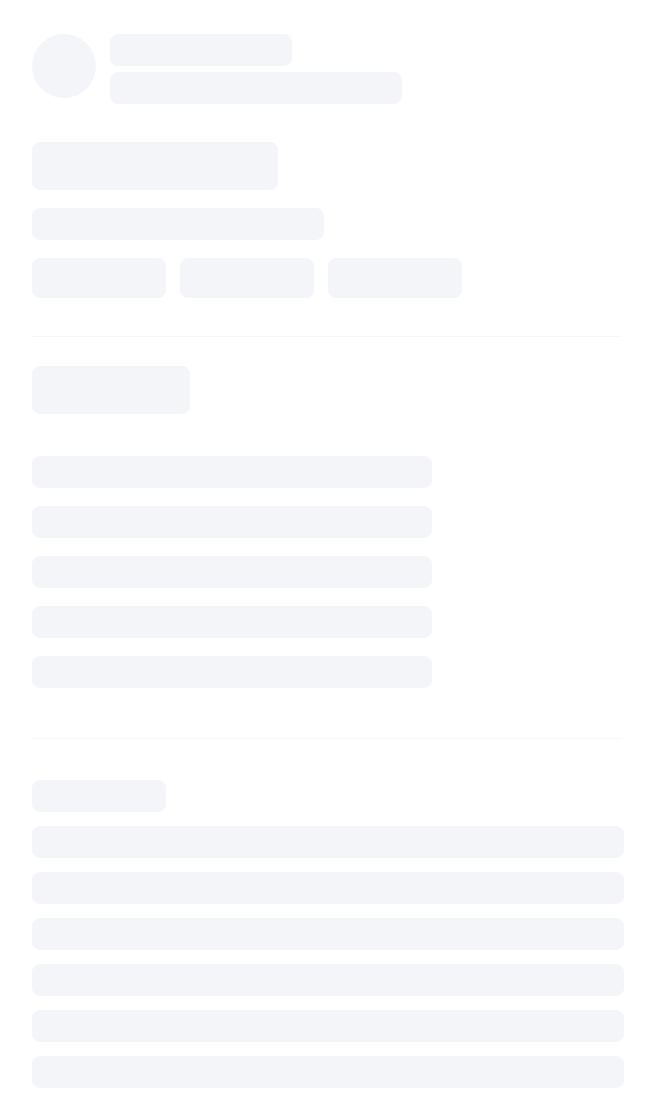
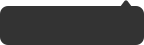
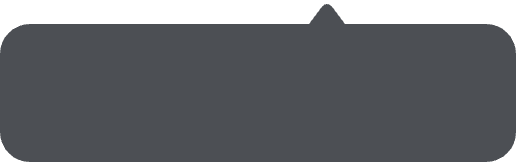
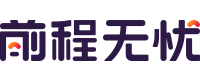

In [1]:
from selenium import webdriver  
from selenium.webdriver.common.by import By  
from selenium.webdriver.support.ui import WebDriverWait  
from selenium.webdriver.support import expected_conditions as EC  

def setup_driver():  
    """设置 Chrome 浏览器驱动"""  
    options = webdriver.ChromeOptions()  
    options.add_experimental_option("detach", True)  
    options.add_experimental_option("excludeSwitches", ["enable-automation"])  
    options.add_experimental_option('useAutomationExtension', False)  
    options.add_argument("--disable-gpu")  
    options.add_argument("--no-sandbox")  
    options.add_argument("--disable-dev-shm-usage")  
    return webdriver.Chrome(options=options)  

def scrape_jobs(web):  
    """抓取职位信息并写入文件"""  
    page = 0  
    with open("5ljob.csv", mode="a", encoding='utf-8') as f:  
        while True:  
            try:  
                # 等待并获取职位列表  
                job_list = WebDriverWait(web, 20).until(  
                    EC.presence_of_all_elements_located((By.CLASS_NAME, 'joblist-item-top'))  
                )  

                for item in job_list:  
                    texts = item.text.splitlines()  
                    if len(texts) >= 2:  
                        position = texts[0]  
                        salary = texts[1] 
                        f.write(f"{position},{salary}\n")  

                page += 1  
                print(f"Page {page} scraped.")  

                # 查找并点击下一页按钮  
                next_button = WebDriverWait(web, 20).until(  
                    EC.element_to_be_clickable((By.XPATH, '/html/body/div/div/div[2]/div/div/div[2]/div/div[2]/div/div[3]/div/div/div/button[2]'))  
                )  
                print('find next_button')
                # 确保按钮可见  
                if next_button.is_displayed() and next_button.is_enabled():  
                    web.execute_script("arguments[0].click();", next_button) 
                    print('click successfully')
                else:  
                    print("Next button is not clickable or not visible.")  
                    break  
                
                # 等待页面加载完成  
                WebDriverWait(web, 20).until(  
                    EC.presence_of_all_elements_located((By.CLASS_NAME, 'joblist-item-top'))  
                )  

            except Exception as e: 
                print('done')
                # print(f"Error occurred: {e}")  
                # print(f"Current URL: {web.current_url}")  
                # print(web.page_source)  # 打印当前页面的源代码以帮助调试  
                break  

def main():  
    """主函数"""  
    web = setup_driver()  
    web.get("https://we.51job.com/pc/search?keyword=%E7%AE%A1%E7%90%86%E4%BA%BA%E5%91%98")  
    
    try:  
        WebDriverWait(web, 20).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "joblist")]')))  
    except Exception as e:  
        print(f"Error waiting for job list: {e}")  
        web.quit()  
        return  
    
    scrape_jobs(web)  
    web.quit()  

if __name__ == "__main__":  
    main()

In [5]:
import sys
print(sys.executable)

D:\Anaconda\python.exe


In [6]:
import sys
print(sys.path)

['E:\\Project\\Jupyter', 'D:\\Anaconda\\python312.zip', 'D:\\Anaconda\\DLLs', 'D:\\Anaconda\\Lib', 'D:\\Anaconda', '', 'D:\\Anaconda\\Lib\\site-packages', 'D:\\Anaconda\\Lib\\site-packages\\win32', 'D:\\Anaconda\\Lib\\site-packages\\win32\\lib', 'D:\\Anaconda\\Lib\\site-packages\\Pythonwin', 'D:\\Anaconda\\Lib\\site-packages\\setuptools\\_vendor']
